# 2. Analysing text

This notebook will introduce you to the basics of analysing text. 
You'll learn how to preprocess and represent text.







Legend of symbols:

- 🤓: Tips

- 🤖📝: Your turn

- ❓: Question

- 💫: Extra exercise 

## 2.1. Corpus preprocessing

Let's import the news dataset using pandas:

In [1]:
! pip install pandas
import pandas as pd
df = pd.read_csv('../data/news.csv')

You should consider upgrading via the '/home/avaldivia/env37/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
df.head()

,topic,media,corpus,headline,link
0,climatic,The Guardian,The reindeer is the emblematic Christmas anima...,Weatherwatch: reindeer adapted to snow but not...,https://www.theguardian.com/world/2019/dec/23/...
1,climatic,The Guardian,The European parliament is split over whether ...,European parliament split on declaring climate...,https://www.theguardian.com/world/2019/nov/26/...
2,climatic,The Guardian,Fisayo Soyombo was eating an evening snack in ...,‘Climate of fear’: Nigeria intensifies crackdo...,https://www.theguardian.com/world/2019/nov/14/...
3,climatic,The Guardian,The European Union considers itself as a leade...,EU's soaring climate rhetoric not always match...,https://www.theguardian.com/world/2019/dec/11/...
4,climatic,The Guardian,"Good morning, we’re now exactly two weeks out ...",Thursday briefing: Political climate too hot f...,https://www.theguardian.com/world/2019/nov/28/...


Analyse the corpus of the first row:

In [3]:
df['corpus'][0]

'The reindeer is the emblematic Christmas animal and, while not exactly magical, it is among the best adapted to snowy conditions.For a start, a reindeer’s feet have four toes with dewclaws that spread out to distribute its weight like snowshoes, and are equipped with sharp hooves for digging in snow.A reindeer’s nose warms the air on its way to the lungs, cooling it again before it is exhaled. As well as retaining heat, this helps prevent water from being lost as vapour. This is why reindeer breath does not steam like human and horse breath.A reindeer’s thick double-layered coat is so efficient that it is more likely to overheat than get too cold, especially when running. When this happens, reindeer pant like dogs to cool down, bypassing the nasal heat exchanger.Snowfields may be featureless to human eyes, but reindeer are sensitive to ultraviolet light, an evolutionary development that only occurred after the animals moved to Arctic regions. Snow reflects ultraviolet, so this ultravi

In [4]:
print(df['corpus'][0])

The reindeer is the emblematic Christmas animal and, while not exactly magical, it is among the best adapted to snowy conditions.For a start, a reindeer’s feet have four toes with dewclaws that spread out to distribute its weight like snowshoes, and are equipped with sharp hooves for digging in snow.A reindeer’s nose warms the air on its way to the lungs, cooling it again before it is exhaled. As well as retaining heat, this helps prevent water from being lost as vapour. This is why reindeer breath does not steam like human and horse breath.A reindeer’s thick double-layered coat is so efficient that it is more likely to overheat than get too cold, especially when running. When this happens, reindeer pant like dogs to cool down, bypassing the nasal heat exchanger.Snowfields may be featureless to human eyes, but reindeer are sensitive to ultraviolet light, an evolutionary development that only occurred after the animals moved to Arctic regions. Snow reflects ultraviolet, so this ultravis

❓ What's the difference between the first output and the second?

### 🤖📝 **Your turn**

Now, print the 5th and 45th row:

In [ ]:
print(df['corpus'][__])

In [ ]:
print(df['corpus'][__])

### 2.1.1. Encodings

🤓 The string **<tt>encode()<tt>** method returns encoded version of the given string. Using string's **<tt>encode()<tt>** method, you can convert unicoded strings into any encodings supported by Python. By default, Python uses UTF-8 encoding.

In [5]:
df['corpus'][0].encode()

b'The reindeer is the emblematic Christmas animal and, while not exactly magical, it is among the best adapted to snowy conditions.For a start, a reindeer\xe2\x80\x99s feet have four toes with dewclaws that spread out to distribute its weight like snowshoes, and are equipped with sharp hooves for digging in snow.A reindeer\xe2\x80\x99s nose warms the air on its way to the lungs, cooling it again before it is exhaled. As well as retaining heat, this helps prevent water from being lost as vapour. This is why reindeer breath does not steam like human and horse breath.A reindeer\xe2\x80\x99s thick double-layered coat is so efficient that it is more likely to overheat than get too cold, especially when running. When this happens, reindeer pant like dogs to cool down, bypassing the nasal heat exchanger.Snowfields may be featureless to human eyes, but reindeer are sensitive to ultraviolet light, an evolutionary development that only occurred after the animals moved to Arctic regions. Snow ref

❓ Which are the symbols that are encoded?

### 2.1.2. Regular expressions

Regular expressions (called REs, or regexes, or regex patterns) are essentially a tiny, highly specialized programming language embedded inside Python and made available through the **<tt>re()<tt>** module.

In [6]:
! pip install re
import re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
You should consider upgrading via the '/home/avaldivia/env37/bin/python3.7 -m pip install --upgrade pip' command.


Using this little language, you specify the rules for the set of possible strings that you want to match.

🤓 The first metacharacters we’ll look at are **<tt>[ and ]<tt>**. They’re used for specifying a character class, which is a set of characters that you wish to match. Characters can be listed individually, or a range of characters can be indicated by giving two characters and separating them by a **<tt>'-'<tt>**. For example, **<tt>[abc]<tt>** will match any of the characters **<tt>a<tt>**, **<tt>b<tt>**, or **<tt>c<tt>**; this is the same as **<tt>[a-c]<tt>**, which uses a range to express the same set of characters. If you wanted to match only lowercase letters, your RE would be **<tt>[a-z]<tt>**.

In [7]:
p = re.compile('[a-z]+')
p

re.compile(r'[a-z]+', re.UNICODE)

Now, you can try matching various strings against the RE **<tt> [a-z]+<tt>**:

An empty string shouldn’t match at all, since **+** means *one or more repetitions*. 

In [11]:
p.match("")
print(p.match(""))

None


Now, let’s try it on a string that it should match, such as **<tt>tempo<tt>**.

In [13]:
m = p.match("tempo")
print(m)

<_sre.SRE_Match object; span=(0, 5), match='tempo'>


In this case, **<tt>match<tt>** will return a match object. This object contains the following features:

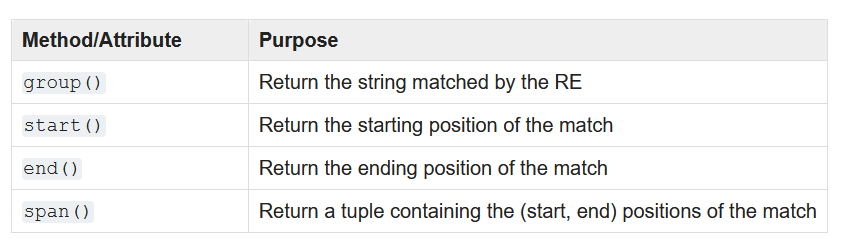

**<tt>group()<tt>** returns the substring that was matched by the RE. **<tt>start()<tt>**  and **<tt>end()<tt>**  return the starting and ending index of the match. **<tt>span()<tt>**  returns both start and end indexes in a single tuple. Since the **<tt>match()<tt>**  method only checks if the RE matches at the start of a string, **<tt>start()<tt>**  will always be zero. However, the **<tt>search()<tt>**  method of patterns scans through the string, so the match may not start at zero in that case.

In [14]:
m.group()

'tempo'

In [15]:
m.start(), m.end()

(0, 5)

In [16]:
m.span()

(0, 5)

**Metacharacters** are characters with a special meaning:

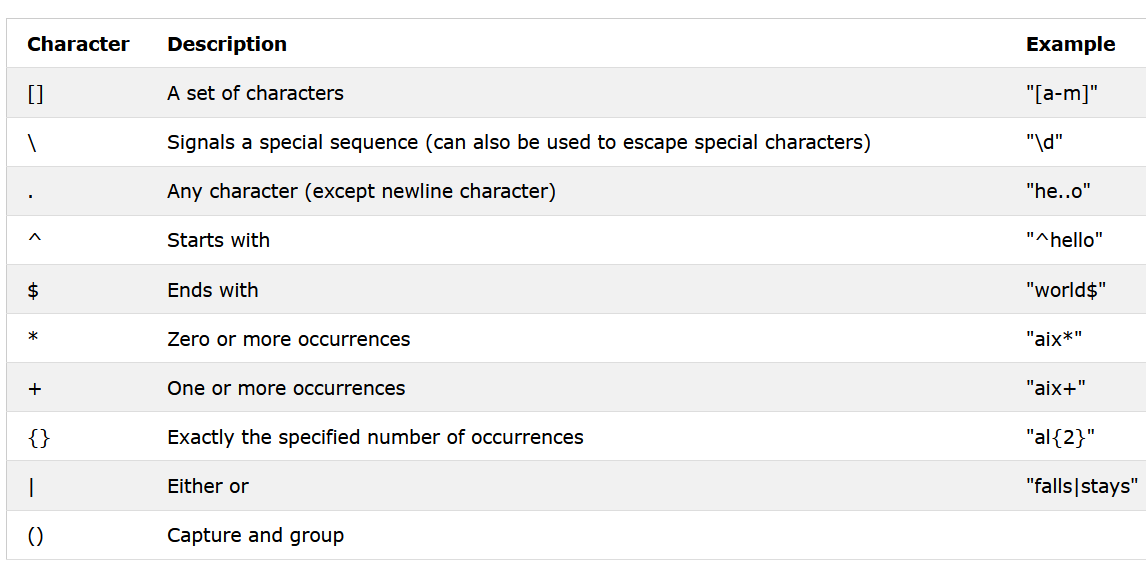
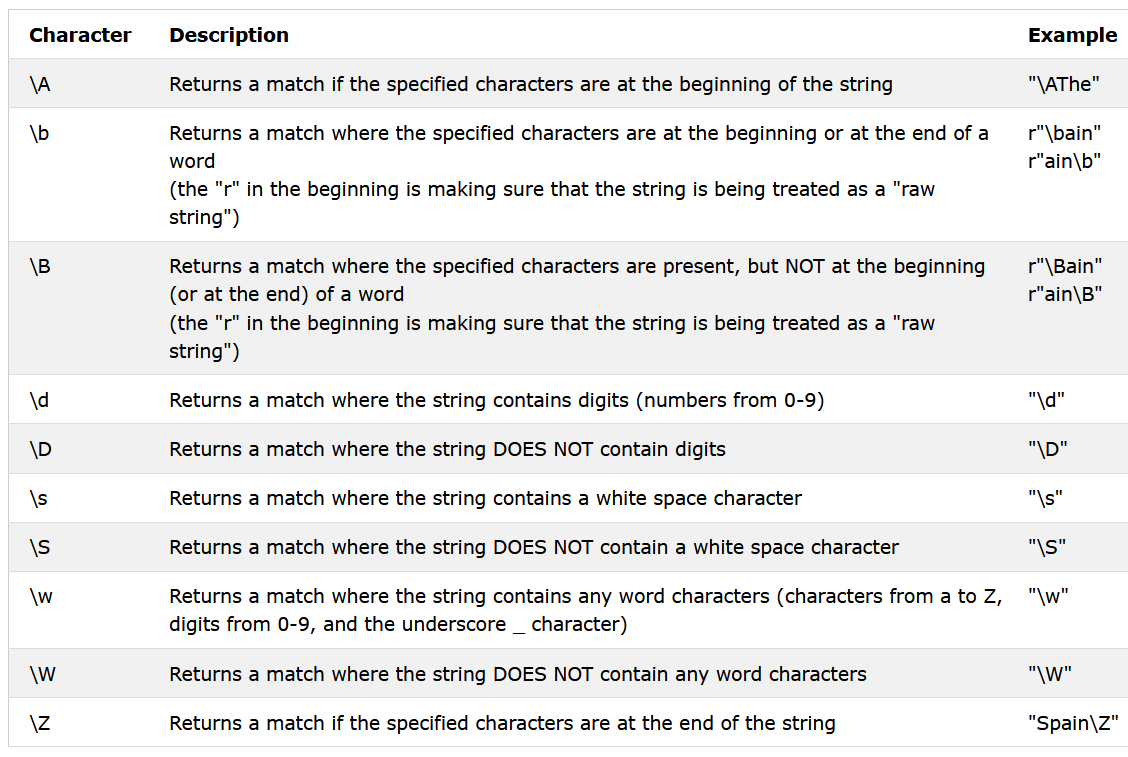

A **set** is a set of characters inside a pair of square brackets **<tt>[]<tt>** with a special meaning:

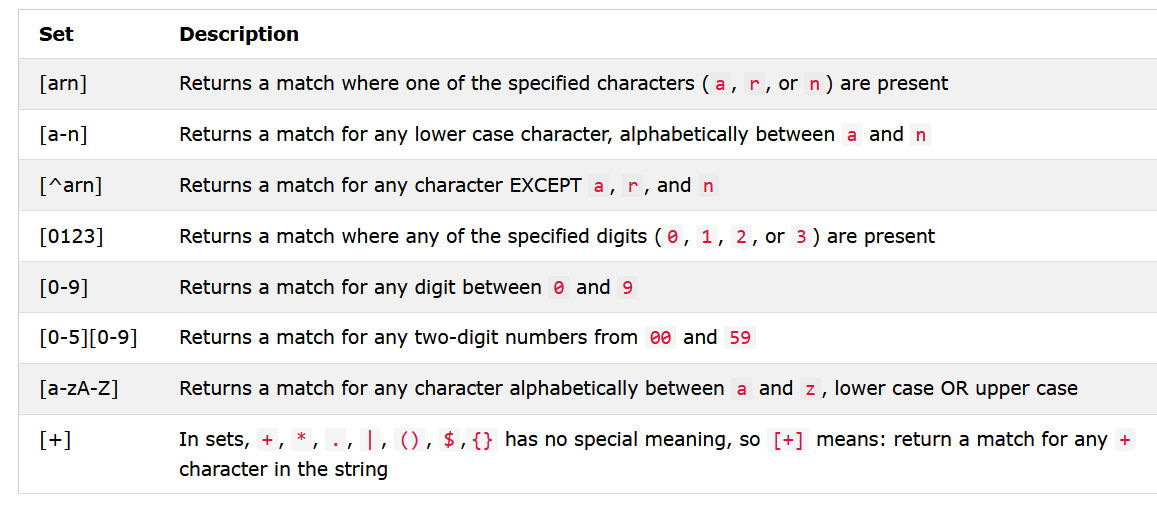

#### 💫 Let's get more familiarised with regular expressions.
Open: https://regex101.com/

Two pattern methods return all of the matches for a pattern. **<tt>findall()<tt>** returns a list of matching strings:

In [ ]:
p = re.compile('\d+')
p.findall('12 drummers drumming, 11 pipers piping, 10 lords a-leaping')

The **<tt>search()<tt>** function searches the string for a match, and returns a Match object if there is a match.

Search for the first white-space character in the string:

In [ ]:
txt = "The rain in Spain"
x = re.search("\s", txt)
x

In [ ]:
print("The first white-space character is located in position:", x.start()) 

### 🤖📝 **Your turn**

Search for the word **Portugal** in the next sentence:

In [ ]:
txt = "The rain in Spain"
x = re.search(______, txt)
print(x) 

Search for the expression **ai** in the next sentence and extract the position:

In [ ]:
txt = "The rain in Spain"

Now, let's find the word **Macron** in the 46th row of the news' corpus and extract its position:

In [ ]:
print(re.search(______, df['corpus'][______]))

🤓 You can read more about regex syntaxis at: https://docs.python.org/3/howto/regex.html

## 2.2. Representing text

In this new section, we will learn how to buil term-document matrices in Python.

To do so, we will import **<tt>scikit-learn()<tt>** library. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. 
    
**<tt>CountVectorizer<tt>** converts a collection of raw documents to a matrix of vocabulary count features.    
**<tt>TfidfVectorizer<tt>** converts a collection of raw documents to a matrix of TF-IDF features.

🤓 Let's read the documentation: 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
! pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Sample data for analysis
df_sentences = df[0:3]

In [ ]:
# Initialize
countvoc_vectorizer = CountVectorizer()
tf_idf_vectorizer = TfidfVectorizer()

doc_countvoc = countvoc_vectorizer.fit_transform(df_sentences.iloc[0])
doc_tf_idf = tf_idf_vectorizer.fit_transform(df_sentences.iloc[0])



In [ ]:
# Create vocabulary count matrix
matrix_countvoc = pd.DataFrame(doc_countvoc.toarray().transpose(),
                   index=countvoc_vectorizer.get_feature_names())

# Create term-document matrix
matrix_tfidf = pd.DataFrame(doc_tf_idf.toarray().transpose(),
                   index=tf_idf_vectorizer.get_feature_names())

In [ ]:
# Vocabulary count matrix
matrix_countvoc.columns = df_sentences.columns
print(matrix_countvoc)

In [ ]:
# Term-document matrix
matrix_tfidf.columns = df_sentences.columns
print(matrix_tfidf)

❓ How would you describe this matrix?

🤓 In numerical analysis and scientific computing, a **sparse matrix** or sparse array is a matrix in which most of the elements are zero. There is no strict definition how many elements need to be zero for a matrix to be considered sparse but a common criterion is that the number of non-zero elements is roughly the number of rows or columns. 

By contrast, if most of the elements are nonzero, then the matrix is considered **dense**. The number of zero-valued elements divided by the total number of elements (e.g., m × n for an m × n matrix) is sometimes referred to as the sparsity of the matrix. 

Let's select only 4 features:

In [ ]:
vectorizer = TfidfVectorizer(max_features=4)
doc_vec = vectorizer.fit_transform(df_sentences.iloc[0])
matrix_2 = pd.DataFrame(doc_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names())

In [ ]:
print(matrix_2)

And now, let's remove **stop_words**:

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
doc_vec = vectorizer.fit_transform(df_sentences.iloc[0])
matrix_3 = pd.DataFrame(doc_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names())
print(matrix_3)

### 2.2.1. Word clouds

And finally, one of the most cool visualisations in text mining: word clouds!

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
word_cloud = WordCloud(background_color="white", repeat=True)
word_cloud.generate(' '.join(df[0:3]['corpus']))

In [ ]:
plt.axis("off")
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

If you want to customise your word cloud, check: https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py.

### 💫 **Extra exercises**

1. Create a wordcloud for each topic on the news dataset.
2. Create a wordcloud for all news that mentioned Macron.
3. Find the word 'violence' in the news dataset.

### Resources

📕 Bengfort, B., Bilbro, R., & Ojeda, T. (2018). *Applied text analysis with python: Enabling language-aware data products with machine learning.* O'Reilly Media, Inc.

📕 Bird, S., Klein, E., & Loper, E. (2009). *Natural language processing with Python: analyzing text with the natural language toolkit.* " O'Reilly Media, Inc.".

🌍 https://docs.python.org/3/howto/regex.html

🌍 https://www.w3schools.com/python/python_regex.asp